In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
from urllib.request import urlopen
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def speech_transcripts(url):
    session = requests.Session()
    retry = Retry(connect=3, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)

    page = session.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    text = [p.text for p in soup.find_all('p')]
    return text

In [3]:
import requests
from bs4 import BeautifulSoup

...
url = "https://www.peacefmonline.com/pages/politics/politics/201210/139453.php"
req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <script type="text/javascript">
  (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"1409561991",accountID:"2571823",trustKey:"2571823",xpid:"VgMAUF5RCxABUFFbAgcGU10E",licenseKey:"NRJS-51b59dff88587454a6f",applicationID:"1409561595"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(31),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1

In [4]:
clean = soup.find('p').get_text()
clean

'\uf0a7\t“It is my belief that the fight against corruption must start with an incorruptible President. I can assure you, in all humility, that I am not, have never been and will never be corrupt.”\uf0a7\t“I can also assure you that as your President, I will NOT condone corruption in my Government. I bring to the table and to the Office of President of this great country an unblemished track record of personal integrity and fortitude. I invite you to bank on my essential leadership attributes and make me your president. I will lead a strong fight against corruption in this country.”\uf0a7\t“I have... told my colleagues, party leadership and associates here and abroad: if your idea is to make corrupt money in Government, then there will be no room for you in my government. If you think of public office as a shortcut to making money, then find some other venture to engage your time and energies, because there will be no room under an Akufo-Addo government for self-enrichment in politics.

In [5]:
periods_given = ['Oct 2012']

In [8]:
# save speeches in the folder
for i, period in enumerate(periods_given):
        with open("speeches_by_president/" + period + ".txt", "wb") as file:
            pickle.dump(clean, file)

In [9]:
load_speeches= []
for period in periods_given:
    with open("speeches_by_president/" + period + ".txt", "rb") as file:
        load_speeches.append(pickle.load(file))

In [10]:
joined_speeches = [' '.join(speech) for speech in load_speeches]

In [15]:
joined_speeches

['\uf0a7 \t “ I t   i s   m y   b e l i e f   t h a t   t h e   f i g h t   a g a i n s t   c o r r u p t i o n   m u s t   s t a r t   w i t h   a n   i n c o r r u p t i b l e   P r e s i d e n t .   I   c a n   a s s u r e   y o u ,   i n   a l l   h u m i l i t y ,   t h a t   I   a m   n o t ,   h a v e   n e v e r   b e e n   a n d   w i l l   n e v e r   b e   c o r r u p t . ” \uf0a7 \t “ I   c a n   a l s o   a s s u r e   y o u   t h a t   a s   y o u r   P r e s i d e n t ,   I   w i l l   N O T   c o n d o n e   c o r r u p t i o n   i n   m y   G o v e r n m e n t .   I   b r i n g   t o   t h e   t a b l e   a n d   t o   t h e   O f f i c e   o f   P r e s i d e n t   o f   t h i s   g r e a t   c o u n t r y   a n   u n b l e m i s h e d   t r a c k   r e c o r d   o f   p e r s o n a l   i n t e g r i t y   a n d   f o r t i t u d e .   I   i n v i t e   y o u   t o   b a n k   o n   m y   e s s e n t i a l   l e a d e r s h i p   a t t r i b u t e s   a n d   m a k e 

In [18]:
speeches_df = pd.DataFrame(
                {'Period':periods_given,
               'Speech': clean} 
                )
speeches_df.set_index('Period', inplace=True)
pd.set_option('max_colwidth',500)

speeches_df[:10]

,Speech
Period,
Oct 2012,"\t“It is my belief that the fight against corruption must start with an incorruptible President. I can assure you, in all humility, that I am not, have never been and will never be corrupt.”\t“I can also assure you that as your President, I will NOT condone corruption in my Government. I bring to the table and to the Office of President of this great country an unblemished track record of personal integrity and fortitude. I invite you to bank on my essential leadership attributes and make ..."


In [19]:
#importing the library 
from textblob import TextBlob

#determining polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

speeches_df['Polarity'] = speeches_df['Speech'].apply(pol)
speeches_df['Subjectivity'] = speeches_df['Speech'].apply(sub)
speeches_df

,Speech,Polarity,Subjectivity
Period,,,
Oct 2012,"\t“It is my belief that the fight against corruption must start with an incorruptible President. I can assure you, in all humility, that I am not, have never been and will never be corrupt.”\t“I can also assure you that as your President, I will NOT condone corruption in my Government. I bring to the table and to the Office of President of this great country an unblemished track record of personal integrity and fortitude. I invite you to bank on my essential leadership attributes and make ...",0.070676,0.420744


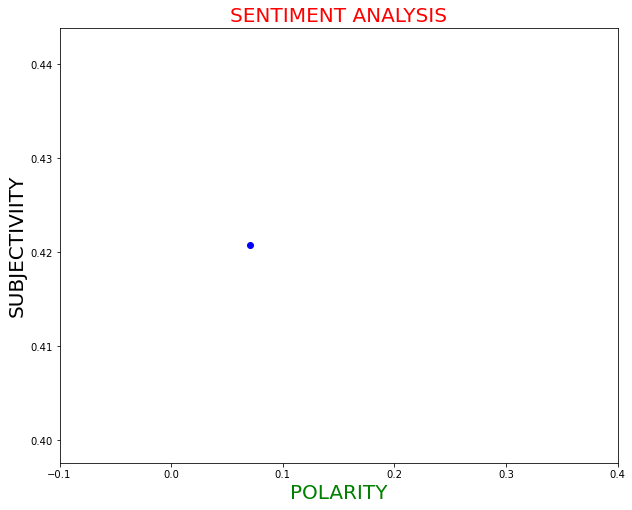

In [20]:
# Plotting the results of the cell above (Sentiment Analysis)
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, aSpeech in enumerate(speeches_df.index):
    x = speeches_df.Polarity.loc[aSpeech]
    y = speeches_df.Subjectivity.loc[aSpeech]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, '', fontsize=20)
    plt.xlim(-.10, .40) 
    
plt.title('SENTIMENT ANALYSIS', fontsize=20, color = 'red')
plt.xlabel('POLARITY', fontsize=20, color = 'green')
plt.ylabel('SUBJECTIVIITY', fontsize=20)
plt.savefig('polarity_subjectivity1.png')

plt.show()

In [22]:
# Splitting into 10 parts
import numpy as np
import math

def split_text(text, n=20):
    

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list


In [23]:
# List to hold pieces of all texts in savedSpeeches
text_split = []
for t in speeches_df.Speech:
    split = split_text(t)
    text_split.append(split)
    
text_split

[['\uf0a7\t“It is my belief that the fight against corruption must start with an incorruptible President. I can assure you, in all humility, that I am not, have never been and will never be corrupt.”\uf0a7\t“I can also assure you ',
  'that as your President, I will NOT condone corruption in my Government. I bring to the table and to the Office of President of this great country an unblemished track record of personal integrity and fortitude. I in',
  'vite you to bank on my essential leadership attributes and make me your president. I will lead a strong fight against corruption in this country.”\uf0a7\t“I have... told my colleagues, party leadership and associates here',
  ' and abroad: if your idea is to make corrupt money in Government, then there will be no room for you in my government. If you think of public office as a shortcut to making money, then find some other venture to eng',
  'age your time and energies, because there will be no room under an Akufo-Addo government for se

In [24]:
# Polarity for each piece of text
polarity_speech = []
for lp in text_split:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_speech.append(polarity_piece)
    
polarity_speech

[[0.0,
  0.3,
  0.21666666666666665,
  -0.20833333333333334,
  -0.5,
  0.0,
  0.21428571428571427,
  0.028138528138528147,
  0.4000000000000001,
  0.1,
  0.4,
  0.12,
  0.6,
  0.0,
  -0.19999999999999998,
  0.0,
  0.06011904761904763,
  0.0075000000000000205,
  0.1,
  0.0]]

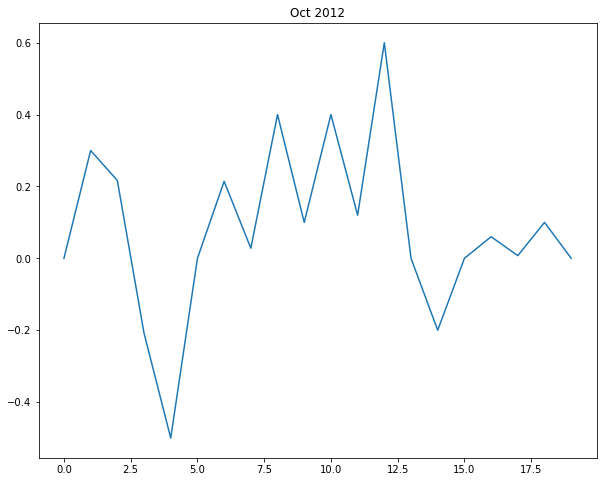

In [25]:
# Plot for one speech
plt.plot(polarity_speech[0])
plt.title(speeches_df.index[0])
plt.savefig('single_polarity1.png')
plt.show()